In [23]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [24]:
data = pd.read_pickle('AgesAndHeights.pkl')
data

Age     Height
0   14.767874  59.627484
1    3.107671  36.146453
2    7.266917  46.912878
3    1.815180  29.125660
4   16.753758  68.170414
..        ...        ...
95   7.323712  46.857505
96   5.591509  39.339990
97   2.625606  32.918925
98   5.519293  40.704154
99  13.117413  55.177407

[100 rows x 2 columns]

<AxesSubplot:>

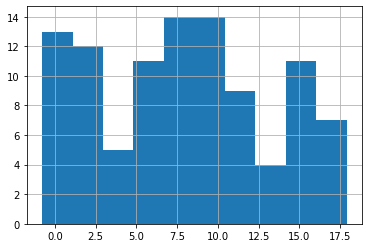

In [25]:
ages = data['Age']
heights = data['Height']
ages.hist()

In [26]:
data = data[ages > 0]
ages = data['Age']
heights =  data['Height']

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>]], dtype=object)

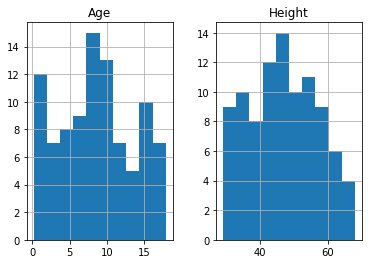

In [27]:
data.hist()

<AxesSubplot:xlabel='Age', ylabel='Height'>

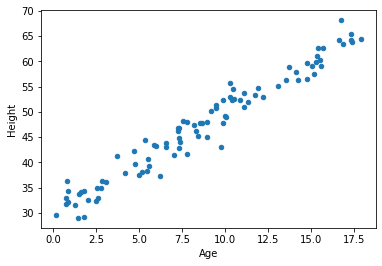

In [28]:
data.plot.scatter(x='Age',y='Height')

In [29]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()
ages_np

array([14.76787382,  3.10767135,  7.26691701,  1.81517968, 16.75375763,
        5.35126307,  8.65571488,  4.20599293,  7.35669106,  1.66817819,
        8.2969588 , 14.74948482, 15.28545214, 16.65534197,  0.85918789,
        8.43332999, 11.92386163,  0.76828323, 11.36202254,  1.29597926,
       10.31206094, 17.39335272, 10.31003056,  6.23764582, 15.55153122,
        2.77346425, 15.59798962,  7.57789784,  2.04165705,  9.90665221,
        2.87252515,  1.54231936,  5.46202264, 15.04362695,  5.99372597,
        4.805291  ,  8.94992003,  5.02020985,  9.89555258,  5.20281507,
        0.19568558,  0.89217393,  7.30979593, 10.8545723 , 15.69876495,
        0.81216582, 15.40144747,  9.21599924,  8.98515379,  3.74369906,
        0.75192511,  6.5963469 ,  9.75112683,  7.40094567, 17.32712575,
       10.53406938, 15.16816596,  9.46971876, 13.54691548,  7.80132294,
        2.51910344,  4.71666526, 10.0386595 , 11.77125476,  8.53738026,
        2.58355771,  1.438003  , 10.40642157, 16.85933332, 12.22

In [30]:
ages_np_reshaped = ages_np.reshape(len(ages),1)
ages_np_reshaped

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0.19568558],
       [ 0.89217393],
       [ 7.30979593],
       [10.8545723 ],
       [15.69876495],
       [ 0

In [31]:
model = LinearRegression().fit(ages_np_reshaped, heights_np)
model.coef_

array([2.0014169])

In [32]:
x_new = np.array(list(range(19))).reshape(19,1)
preds = model.predict(x_new)
preds

array([29.96185761, 31.96327451, 33.96469141, 35.96610831, 37.96752521,
       39.96894211, 41.97035901, 43.97177591, 45.97319281, 47.9746097 ,
       49.9760266 , 51.9774435 , 53.9788604 , 55.9802773 , 57.9816942 ,
       59.9831111 , 61.984528  , 63.9859449 , 65.9873618 ])

In [33]:
fig = px.scatter(x=ages,y=heights,title="Height vs Age of People",labels={'x':'Age (years)','y':'Height (inches)'})

fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))
fig.write_image('base_pic.svg', width = 800)
fig.show()

In [34]:
from joblib import dump, load

dump(model, 'model.joblib')

['model.joblib']

In [35]:
model_in = load('model.joblib')
model_in.predict(np.array([[1]]))

array([31.96327451])

In [36]:
def make_picture(training_data_filename, model, new_inp_np_arr, output_file):
    data = pd.read_pickle(training_data_filename)
    ages = data['Age']
    data = data[ages > 0]
    ages = data['Age']
    heights =  data['Height']
    x_new = np.array(list(range(19))).reshape(19,1)
    preds = model.predict(x_new)
    fig = px.scatter(x=ages,y=heights,title="Height vs Age of People",labels={'x':'Age (years)','y':'Height (inches)'})

    fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))

    new_preds = model.predict(new_inp_np_arr)

    fig.add_trace(go.Scatter(x=new_inp_np_arr.reshape(len(new_inp_np_arr)),y=new_preds,name = 'New Outputs', mode='markers',marker= dict(color='purple', size=20, line=dict(color='purple',width=2))))

    fig.write_image(output_file, width = 800)

    fig.show()

make_picture('AgesAndHeights.pkl', model_in, floats_string_to_np_arr('1, 2,17'), 'x.svg')

In [37]:
def floats_string_to_np_arr(floats_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    floats = np.array([float(x)  for x in floats_str.split(',') if is_float(x)])
    return floats.reshape(len(floats),1)

floats_string_to_np_arr('1, 2,17')

array([[ 1.],
       [ 2.],
       [17.]])